# Integração Parte 1 - Python para "Criar" Bases de Dados

### Qual arquivo vamos importar?

- Vamos usar o mesmo exemplo que usamos da empresa Contoso no módulo de Análise de Dados

Temos 4 arquivos diferentes:
- Vendas
- Lojas
- Clientes
- Produtos

E vamos integrar eles em 1 arquivo único apenas com as informações relevantes. Depois, vamos importar essa base tratada para o Power BI

In [2]:
from pathlib import Path
caminho = Path.cwd()
print(caminho)

c:\Users\alvar\OneDrive\00 - Dados\04 - Cursos e Treinamentos\00 - Hashtag Treinamentos\00 - Python Impressionador\Módulo 36 - Integração Python e Power BI


In [9]:
import pandas as pd
import os
#from pathlib import Path

#importando os arquivos
#caminho_padrao = r'C:\Users\joaop\Google Drive\Python Impressionador\Pyhon e Power BI'
caminho_padrao = r'C:\Users\alvar\OneDrive\00 - Dados\04 - Cursos e Treinamentos\00 - Hashtag Treinamentos\00 - Python Impressionador\Módulo 36 - Integração Python e Power BI'
#caminho_padrao = Path.cwd()
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'vendas.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';', encoding='ISO-8859-1')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


In [10]:
dataset = vendas_df
tres_lojas_df = dataset[dataset['ID Loja'].isin([86, 306, 172])]
display(tres_lojas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,21/05/2017,22/05/2017,1,86,981,1,21344,10,0,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,08/06/2017,11/06/2017,3,172,1287,1,559,5,0,Contoso Genuine Leather Grip Belt E322 White,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,17/09/2017,23/09/2017,6,172,1236,3,13331,6,0,"Fabrikam Social Videographer 1"" 25mm E400 Blue",Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,18/10/2017,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam Social Videographer 1'' 25mm E400 White,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,30/10/2017,02/11/2017,3,172,937,1,341,10,0,SV 4GB Laptop Memory M65 White,Loja Contoso Hartford,mpadfield9g@usnews.com


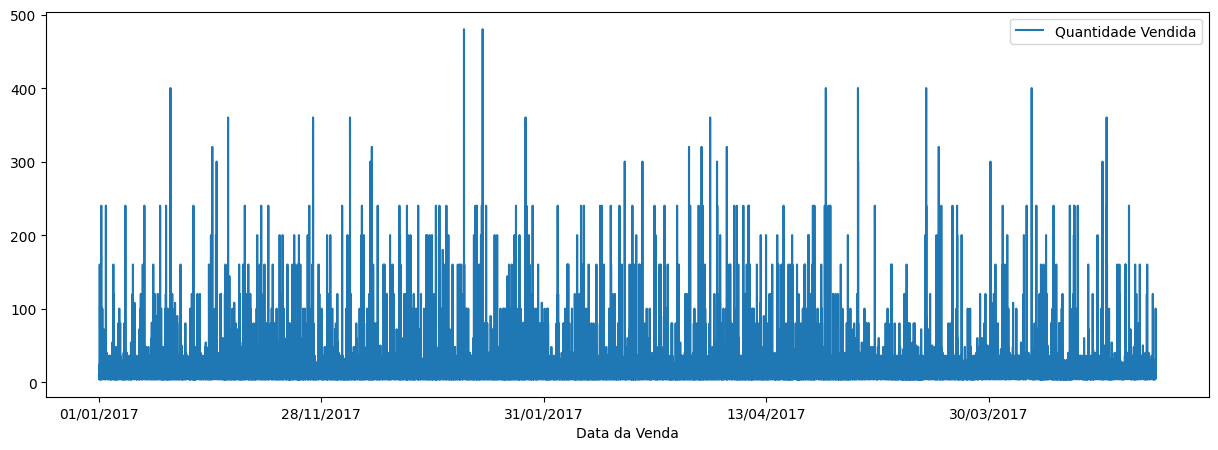

In [12]:
import matplotlib.pyplot as plt
tres_lojas_df.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15,5))
plt.show()